# Sales Analysis

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1: Merging 12 Months Data into a Single CSV File

In [2]:
import os

In [3]:
# Define the folder path
folder_path = r"C:\Users\91893\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"

# Create a list to hold the dataframes
dfs = []

# Loop through all the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file
        df = pd.read_csv(file_path)
        # Append the dataframe to the list
        dfs.append(df)

# Concatenate all dataframes in the list
year_data = pd.concat(dfs, ignore_index=True)

# Define the output path for the final dataframe
output_path = os.path.join(folder_path, 'year.csv')

# Save the concatenated dataframe into a single CSV file
year_data.to_csv(output_path, index=False)

        

#### Reading the Updated Data Frame

In [2]:
all_data = pd.read_csv(r"C:\Users\91893\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\year.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Task 2: Clean the Data 

#### Drop the NaN Values

In [3]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')

#### Finding 'Or' and Deleting it 

In [4]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Converting Columns to the Correct Data Types 

In [5]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### Augmenting Data with Additional Columns

### Task 2: Add Month Column

In [6]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task 3: Add Sales Column 

In [7]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Task 4: Add City Column 

In [8]:
#We will use the .apply method to extract the city

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Q1. What was the best month for sales? How much money was earned that month?

In [9]:
Results = all_data.groupby('Month').sum()

C:\Users\91893\AppData\Local\Temp\ipykernel_3424\495084765.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Results = all_data.groupby('Month').sum()


In [10]:
Results['Sales'] = Results['Sales'].astype(int)

In [11]:
Results.reset_index(inplace = True)

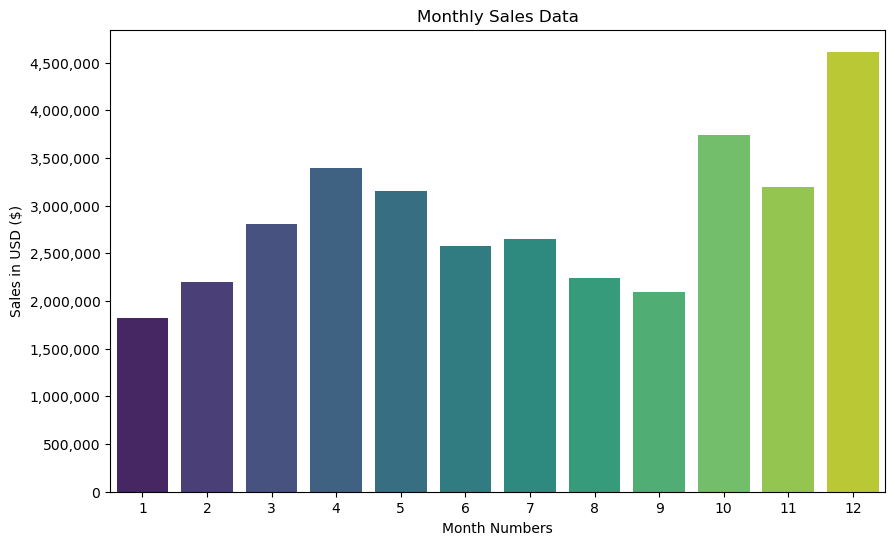

In [12]:
#Plotting the Bar Chart to Display Sales for Each Month
import matplotlib.ticker as mticker

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sales', data=Results, palette='viridis')

# Set the title and labels
plt.title('Monthly Sales Data')
plt.xlabel('Month Numbers')
plt.ylabel('Sales in USD ($)')

# Format y-axis to display large numbers with commas
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Optionally, you can set a specific interval for y-ticks
plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Show the plot
plt.show()

#### Q2. What City Had the Highest Number of Sales  

In [13]:
City_Sales = all_data.groupby('City').sum()

C:\Users\91893\AppData\Local\Temp\ipykernel_3424\3042069192.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  City_Sales = all_data.groupby('City').sum()


In [14]:
City_Sales.reset_index(inplace = True)

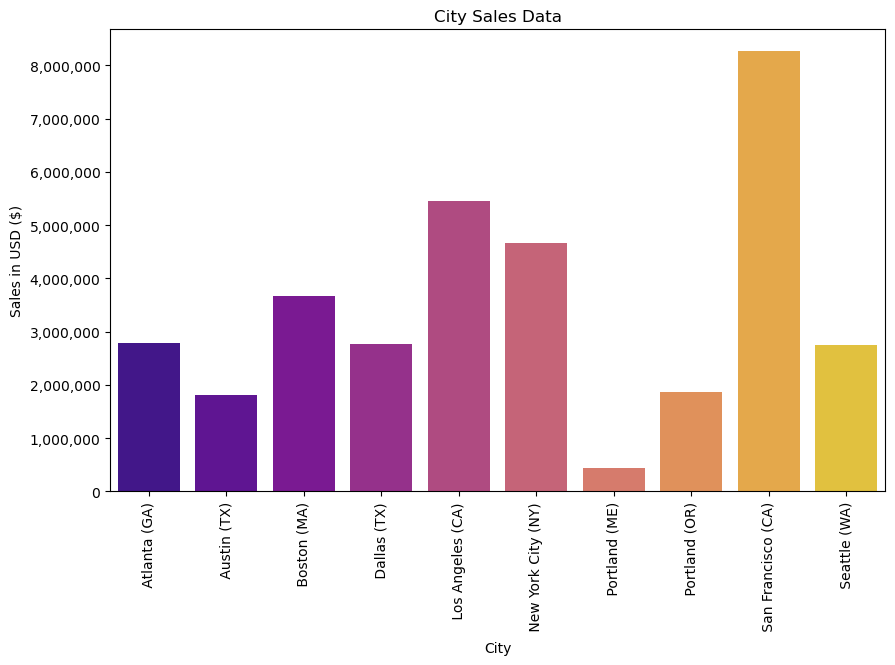

In [15]:
#Plotting the Bar Chart to Display Sales from Each City
import matplotlib.ticker as mticker

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Sales', data=City_Sales, palette='plasma')

# Set the title and labels
plt.title('City Sales Data')
plt.xlabel('City')
plt.ylabel('Sales in USD ($)')
plt.xticks(rotation = 90)
# Format y-axis to display large numbers with commas
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Optionally, you can set a specific interval for y-ticks
plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Show the plot
plt.show()

#### Q3. What Time Should We Display Advertisements to Maximize the Chances of Customer's Buying Product 

In [16]:
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])

In [17]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [18]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


C:\Users\91893\AppData\Local\Temp\ipykernel_3424\1599302945.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=hourly_counts, x='Hour', y='Counts', marker='o', palette='viridis')


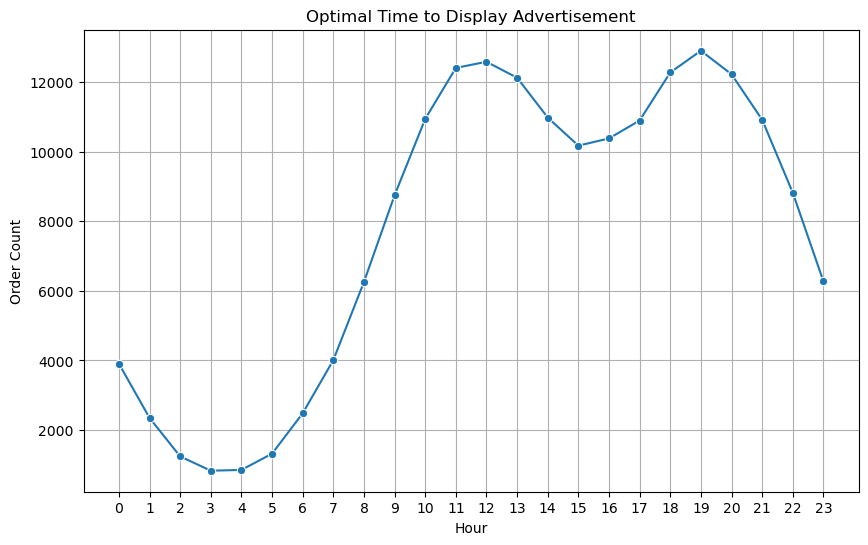

In [19]:
# Group the data by 'Hour' and count the number of entries for each hour
hourly_counts = all_data.groupby('Hour').size().reset_index(name='Counts')

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_counts, x='Hour', y='Counts', marker='o', palette='viridis')
plt.title('Optimal Time to Display Advertisement')
plt.xlabel('Hour')
plt.ylabel('Order Count')
plt.grid(True)
plt.xticks(hourly_counts['Hour'])  # Ensure all hours are displayed
plt.show()

#I would recommend to show ads at around 11AM to 12PM and 7PM. 

#### Q4. What Products are Most Often Sold Together?

In [20]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

C:\Users\91893\AppData\Local\Temp\ipykernel_3424\1929459263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [21]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


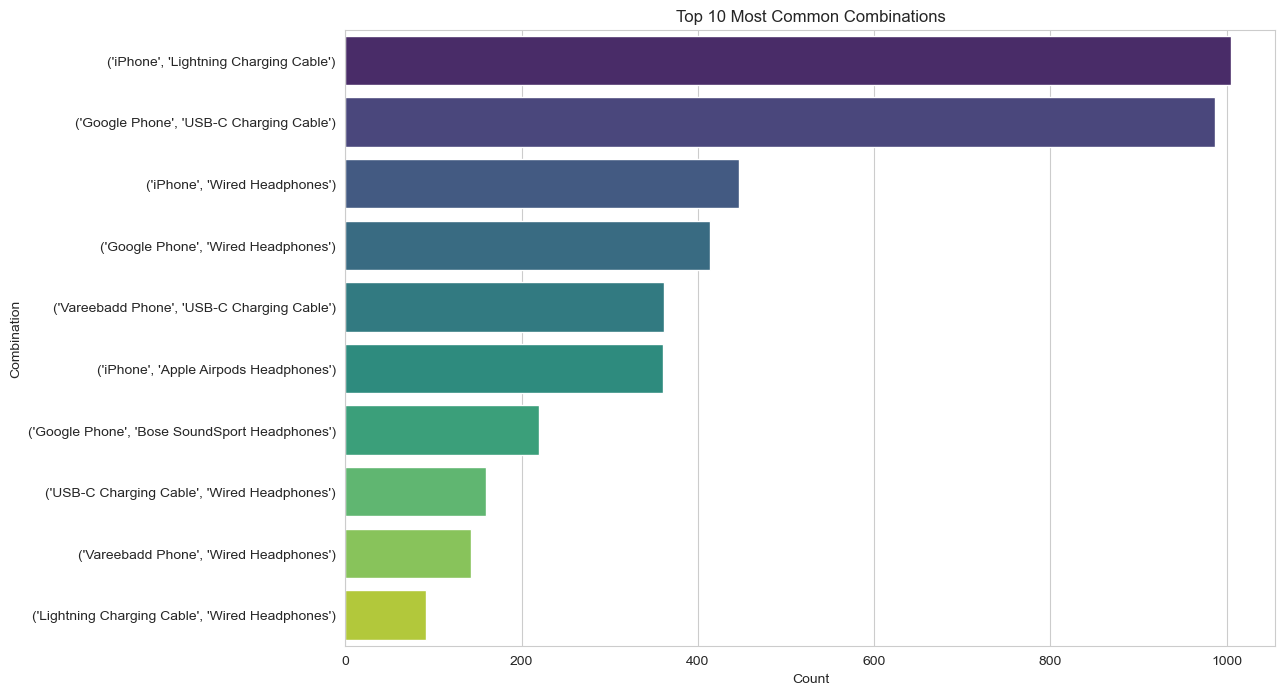

In [22]:
# Convert Counter to DataFrame
count_df = pd.DataFrame(count.items(), columns=['Combination', 'Count'])

# Sort the DataFrame by 'Count' in descending order and get top 10
top_combinations = count_df.sort_values(by='Count', ascending=False).head(10)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Combination', data=top_combinations, palette='viridis')

# Set the title and labels
plt.title('Top 10 Most Common Combinations')
plt.xlabel('Count')
plt.ylabel('Combination')

# Display the plot
plt.show()

#### Q5. What Products Sold the Most? Why Do You Think It Sold the Most?

C:\Users\91893\AppData\Local\Temp\ipykernel_3424\3343558331.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity = product_group.sum()['Quantity Ordered']


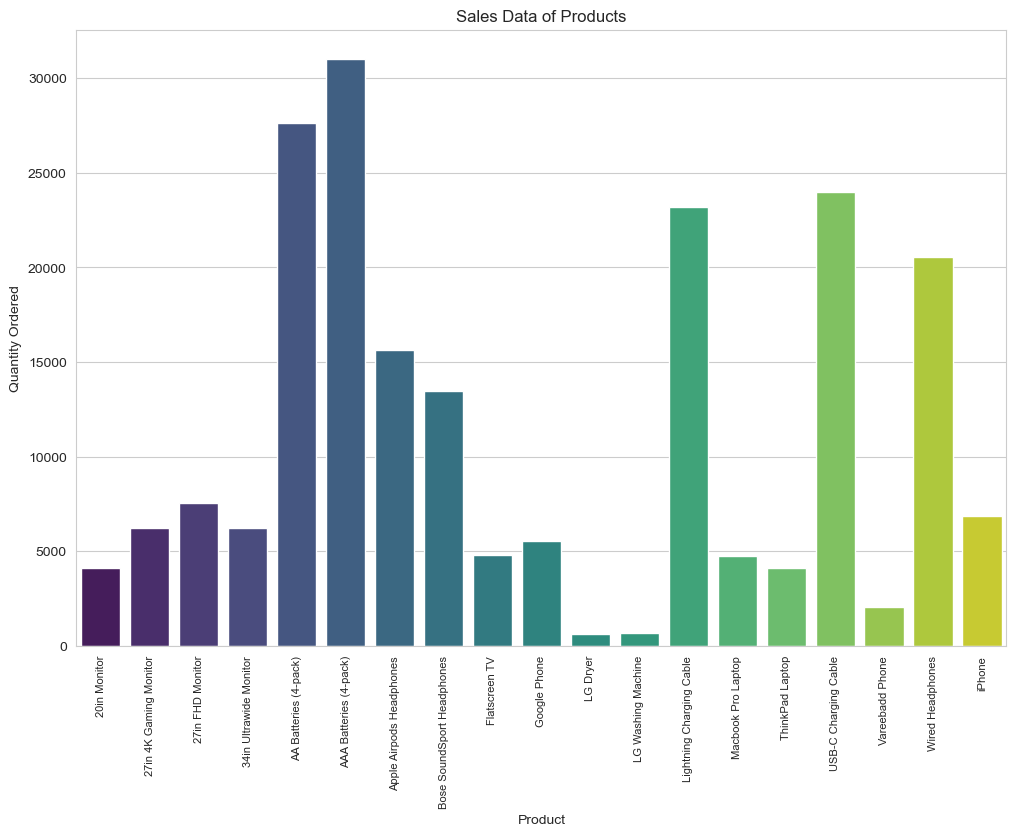

In [23]:
product_group = all_data.groupby('Product')

quantity = product_group.sum()['Quantity Ordered']

products =[product for product, df in product_group]

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=products, y=quantity, palette='viridis')

# Set the title and labels
plt.title('Sales Data of Products')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')

# Rotate x-ticks for better readability
plt.xticks(rotation='vertical', size=8)

# Display the plot
plt.show()


C:\Users\91893\AppData\Local\Temp\ipykernel_3424\2930470698.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity = product_group.sum()['Quantity Ordered']
C:\Users\91893\AppData\Local\Temp\ipykernel_3424\2930470698.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = product_group.mean()['Price Each']


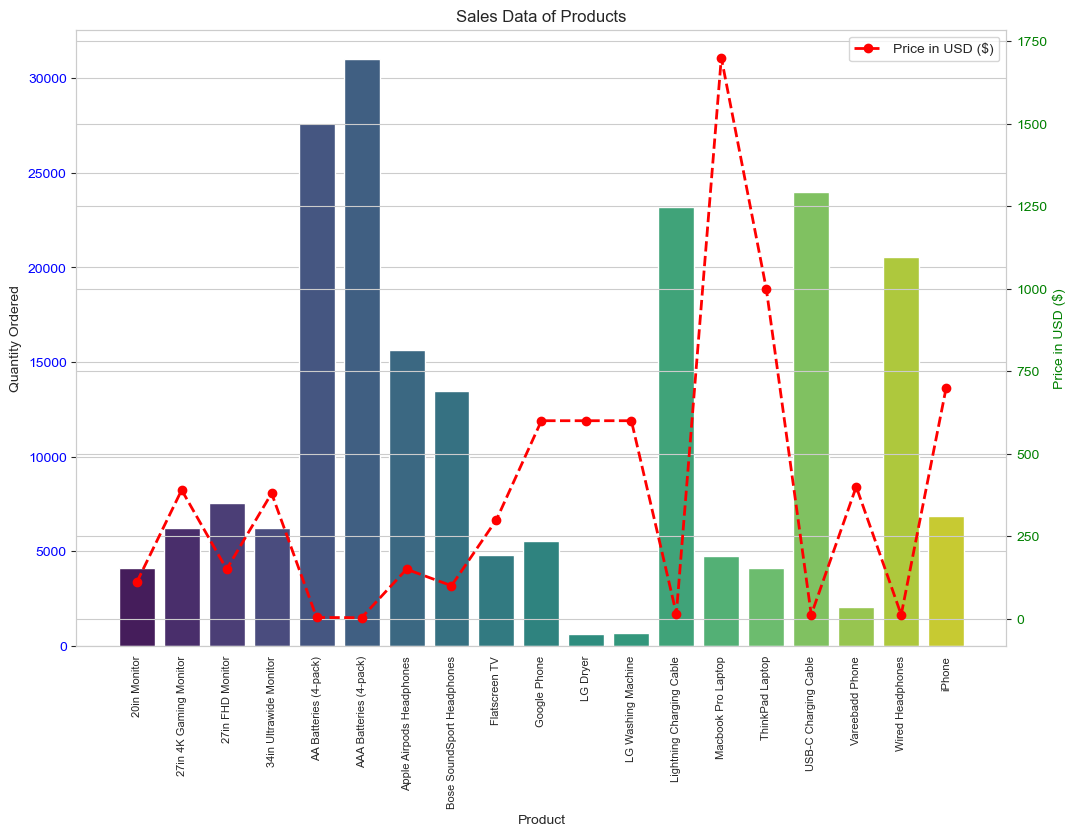

In [27]:

product_group = all_data.groupby('Product')
quantity = product_group.sum()['Quantity Ordered']
prices = product_group.mean()['Price Each']

# List of products
products = [product for product, df in product_group]

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and primary axis for the bar plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Create the bar plot for quantity
sns.barplot(x=products, y=quantity, palette='viridis', ax=ax1)

# Set the title and labels for the primary y-axis
ax1.set_title('Sales Data of Products')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered')
ax1.tick_params(axis='y', labelcolor='blue')

# Rotate x-ticks for better readability
ax1.set_xticklabels(products, rotation='vertical', size=8)

# Create a secondary y-axis for the price data
ax2 = ax1.twinx()
ax2.plot(products, prices, color='red', marker='o', linestyle='--', linewidth=2, label='Price in USD ($)')

# Set the title and labels for the secondary y-axis
ax2.set_ylabel('Price in USD ($)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Show legend for the secondary axis
ax2.legend(loc='upper right')

# Display the plot
plt.show()
